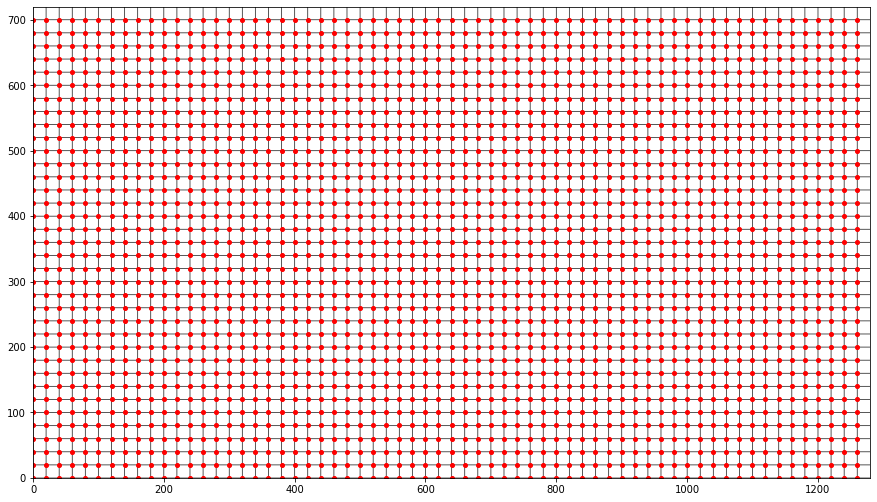

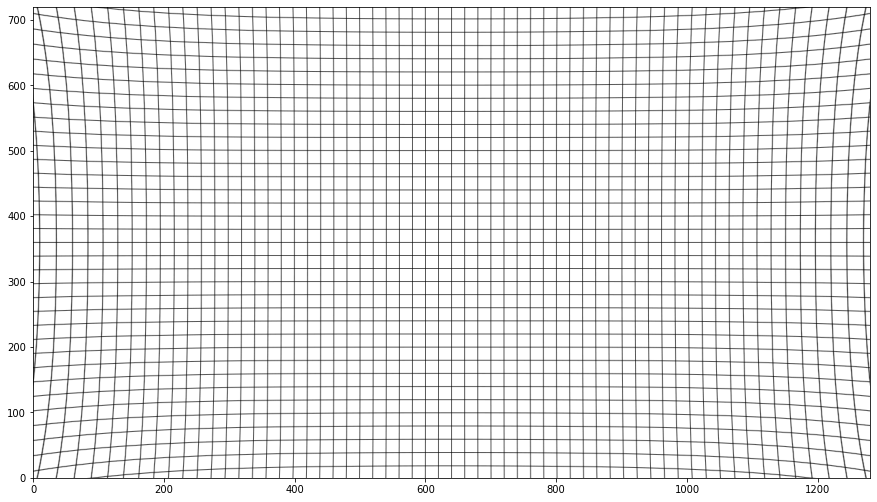

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
plt.rcParams["figure.figsize"]=15, 15

w = 1280
h = 720

def plotImageAndPoints(im, pu, pv):
    plt.imshow(im, cmap="gray")
    plt.scatter(pu, pv, c="red", s=16)
    plt.xlim(0, w)
    plt.ylim(0, h)
    plt.show()

def cv_undistortPoints(uSrc, vSrc, cameraMatrix, distCoeffs):
    uvSrc = np.array([np.matrix([uSrc, vSrc]).transpose()], dtype="float32")
    uvDst = cv.undistortPoints(uvSrc, cameraMatrix, distCoeffs, None, cameraMatrix)
    uDst = [uv[0] for uv in uvDst[0]]
    vDst = [uv[1] for uv in uvDst[0]]
    return uDst, vDst

img = np.ones((h, w), dtype = "float32")
img[0::20, :] = 0
img[:, 0::20] = 0

uPoints, vPoints = np.meshgrid(range(0, w, 20), range(0, h, 20), indexing='xy')
uPoints = uPoints.flatten()
vPoints = vPoints.flatten()

plotImageAndPoints(img, uPoints, vPoints)

fx = 1
fy = 1
cx = int(w/2)
cy = int(h/2)

ratio = -0.0000000000003

k1 = ratio
k2 = ratio
p1 = ratio
p2 = ratio

mtx = np.matrix([
    [fx,  0, cx],
    [ 0, fy, cy],
    [ 0,  0,  1]
], dtype = "float32")

dist = np.array([k1, k2, p1, p2], dtype = "float32")


imgUndist = cv.undistort(img, mtx, dist)

uPointsUndist, vPointsUndist = cv_undistortPoints(uPoints, vPoints, mtx, dist)

plotImageAndPoints(imgUndist, uPointsUndist, vPointsUndist)